In [0]:
import numpy as np
import json
from zipfile import ZipFile 
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten


In [71]:
#reading the json file content
file_List =[]
y_List=[]
with open('DataInfo.json') as json_file:
    data = json.load(json_file)
    for a in data:
      file_List.append(a[0]);
      y_List.append(np.array(a[1]));


# print(file_List)

#Extracting necessary emoji pictures based on Dataset

with ZipFile("Emoji_Downloaded.zip", 'r') as zip: 
    zipObj = ZipFile('Train_Data.zip', 'w')
    for i in file_List:
      zipObj.write(zip.extract('Emoji_Downloaded/'+str(i)+".png"))
    zipObj.close();
    # print(zip.namelist())
        
with ZipFile('Train_Data.zip', 'r') as zipnewfile: 
    # printing all the contents of the zip file 
    zipnewfile.printdir() 

#Training Images Created

/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/105.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/11.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/4.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/37.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/0.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: UserWarning: Duplicate name: 'content/Emoji_Downloaded/102.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.6/zipfile.py:1378: User

File Name                                             Modified             Size
content/Emoji_Downloaded/67.png                2019-11-28 01:04:50        16278
content/Emoji_Downloaded/105.png               2019-11-28 01:04:50        19322
content/Emoji_Downloaded/0.png                 2019-11-28 01:04:50        18631
content/Emoji_Downloaded/11.png                2019-11-28 01:04:50        17568
content/Emoji_Downloaded/89.png                2019-11-28 01:04:50        20786
content/Emoji_Downloaded/110.png               2019-11-28 01:04:50        18613
content/Emoji_Downloaded/47.png                2019-11-28 01:04:50        21521
content/Emoji_Downloaded/71.png                2019-11-28 01:04:50        17523
content/Emoji_Downloaded/106.png               2019-11-28 01:04:50        18628
content/Emoji_Downloaded/68.png                2019-11-28 01:04:50        18249
content/Emoji_Downloaded/38.png                2019-11-28 01:04:50        17690
content/Emoji_Downloaded/102.png        

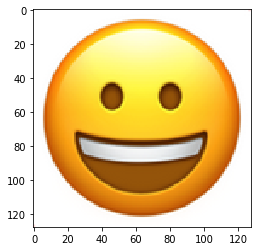

3


In [72]:
X_List = []
def generateTrainingData():
  with ZipFile("Train_Data.zip", 'r') as zip: 
    for name in zip.namelist():
      name = "'"+name+"'"
      filepath = "/".join(name.strip("/").split('/')[1:])
      filepath=filepath[:-1]
      img_array = cv2.imread(filepath)
      img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR) #RGBtoBGR(For Loading Exact Images)
      X_List.append([img_array])
      # print(img_array.shape)
      
      # break;
generateTrainingData()

plt.imshow(X_List[2][0])

plt.show()
print(y_List[2])

In [0]:
#converting the labels and imagedata into numpyarray from the list
X_List = np.array(X_List).reshape(-1, 128, 128, 3)
y_List = np.vstack(y_List) 
# print(X_List.shape)
# print(y_List.shape)

# print(y_List)
# type(y_List)

In [0]:
#Normalizing the data

X_List = X_List/255.0
# print(X_List)


In [78]:
#Using Keras for implementing the CNN for extracting information


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop", 
              metrics=['accuracy'])

model.fit(X_List, y_List, epochs= 15, batch_size=64, validation_split=0.2)


Train on 1692 samples, validate on 423 samples
Epoch 1/15
1692/1692 [==============================] - 2s 1ms/sample - loss: nan - acc: 0.2187 - val_loss: nan - val_acc: 0.2317
Epoch 2/15
1692/1692 [==============================] - 1s 789us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2246
Epoch 3/15
1692/1692 [==============================] - 1s 789us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2293
Epoch 4/15
1692/1692 [==============================] - 1s 787us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2199
Epoch 5/15
1692/1692 [==============================] - 1s 789us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2293
Epoch 6/15
1692/1692 [==============================] - 1s 785us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2222
Epoch 7/15
1692/1692 [==============================] - 1s 792us/sample - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.2246
Epoch 8/15
1692/1692 [=========

(4, 1)